## NAMA : FAQIH ALAM 
## NIM  :  2101221047
## TUGAS : Minggu 5


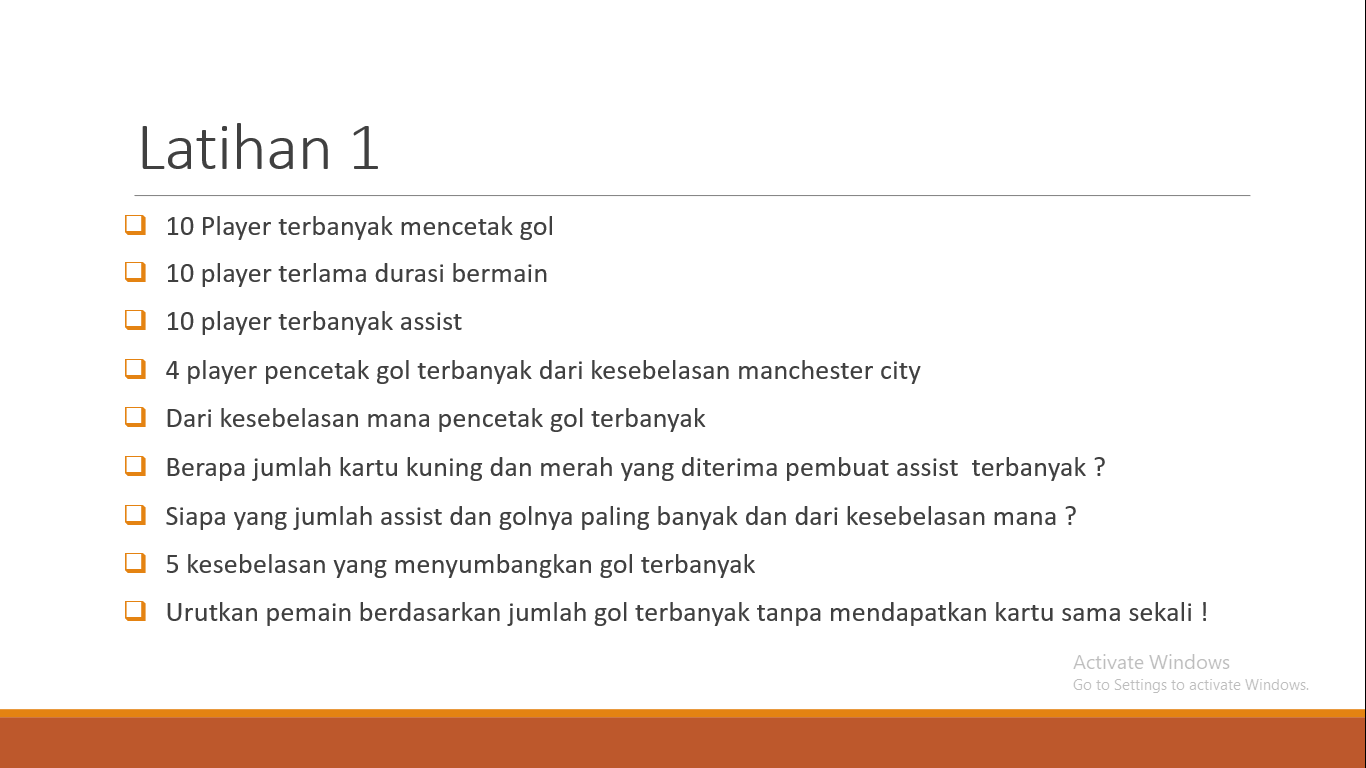

In [ ]:
#Mempersiapkan dataset 
import pandas as pd
import numpy as np
file='/content/drive/MyDrive/Colab Notebooks/Tugas Minggu 5/epl-goalScorer(20-21).csv'
content=pd.read_csv(file)
content.head()

,Unnamed: 0,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
0,0,647,Harry Kane,35,3097,23,22.174859,14,7.577094,138,49,1,0,F,Tottenham,19,19.130183,24.995648,4.451257
1,1,1250,Mohamed Salah,37,3085,22,20.250847,5,6.528526,126,55,0,0,F M S,Liverpool,16,15.683834,28.968234,9.800236
2,2,1228,Bruno Fernandes,37,3117,18,16.019454,12,11.474996,121,95,6,0,M S,Manchester United,9,8.407840,26.911412,11.932285
3,3,453,Son Heung-Min,37,3139,17,11.023287,10,9.512992,68,75,0,0,F M S,Tottenham,16,10.262118,20.671916,6.608751
4,4,822,Patrick Bamford,38,3085,17,18.401863,7,3.782247,107,30,3,0,F S,Leeds,15,16.879525,23.394953,4.131796


#### **10** player terbanyak mencetak gol
 

In [ ]:
content.loc[0:9, ["player_name","goals"]]

,player_name,goals
0,Harry Kane,23
1,Mohamed Salah,22
2,Bruno Fernandes,18
3,Son Heung-Min,17
4,Patrick Bamford,17
5,Dominic Calvert-Lewin,16
6,Jamie Vardy,15
7,Ollie Watkins,14
8,Ilkay Gündogan,13
9,Alexandre Lacazette,13


#### 10 player terlama durasi bermain

In [ ]:
x2 = content.loc[:,["player_name","time"]]
x2 = x2.sort_values(by="time", ascending = False)
x2 = x2.iloc[0:9,:]
x2

,player_name,time
296,Hugo Lloris,3420
378,Emiliano Martinez,3420
311,Kasper Schmeichel,3420
110,Pierre-Emile Højbjerg,3420
40,Stuart Dallas,3412
327,Matt Targett,3407
480,Luke Ayling,3400
204,Andrew Robertson,3391
55,Youri Tielemans,3359


#### 10 player terbanyak assist

In [ ]:
assists = content.loc[:,["player_name","assists"]]
assists = assists.sort_values(by="assists", ascending = False)
assists = assists.iloc[0:9,:]
assists

,player_name,assists
0,Harry Kane,14
2,Bruno Fernandes,12
58,Kevin De Bruyne,11
3,Son Heung-Min,10
51,Jack Grealish,10
15,Marcus Rashford,9
6,Jamie Vardy,9
57,Raphinha,9
49,Timo Werner,8


#### 4 player pencetak gol terbanyak dari kesebelasan manchaster city

In [ ]:
Manchester_City = content.loc[content.team_title=="Manchester City"]
Manchester_City = Manchester_City.sort_values(by="goals", ascending = False)
Manchester_City = Manchester_City.iloc[0:4,:]
Manchester_City = Manchester_City.loc[:,["player_name","goals"]]
Manchester_City

,player_name,goals
8,Ilkay Gündogan,13
22,Raheem Sterling,10
28,Riyad Mahrez,9
35,Gabriel Jesus,8


#### Dari kesebelasan mana, pemain di liga inggris yang mencetak gol terbanyak tahun lalu?

In [ ]:
Top_Goals = content.loc[:,["player_name","goals","team_title"]]
Top_Goals = Top_Goals.sort_values(by = "goals", ascending=False)
Top_Goals.loc[:0,:]

,player_name,goals,team_title
0,Harry Kane,23,Tottenham


#### Berapa jumlah kartu kuning dan merah yang diterima pembuat assist  terbanyak ?

In [ ]:
kartu_topassists = content.loc[:,["player_name","assists","yellow_cards", "red_cards"]]
kartu_topassists = kartu_topassists.sort_values(by="assists", ascending=False)
kartu_topassists.loc[:0,:]

,player_name,assists,yellow_cards,red_cards
0,Harry Kane,14,1,0


#### Siapa yang jumlah assist dan golnya paling banyak dan dari kesebelasan mana ?

In [ ]:
Top_Goals_Assists = content.loc[:,"goals"] + content.loc[:,"assists"] 
Top_Player = content[["player_name", "team_title", "assists", "goals"]]
Top_Player = Top_Player.assign(Goal_Assists = Top_Goals_Assists)
Top_Player = Top_Player.sort_values(by="Goal_Assists", ascending=False)
Top_Player = Top_Player.loc[:0,:]
Top_Player

,player_name,team_title,assists,goals,Goal_Assists
0,Harry Kane,Tottenham,14,23,37


#### 5 kesebelasan yang menyumbangkan gol terbanyak

In [ ]:
kesebelasan = content.groupby("team_title")["goals"].sum()
Top_Club = kesebelasan.sort_values(ascending=False)
Top_Club.head()

team_title
Manchester City      77
Manchester United    68
Tottenham            66
Liverpool            64
Leicester            64
Name: goals, dtype: int64

#### Urutkan pemain berdasarkan jumlah gol terbanyak tanpa mendapatkan kartu sama sekali !

In [ ]:
nomor9 = content.loc[:,["player_name","goals","yellow_cards", "red_cards"]]
nomor9b = content.loc[content["yellow_cards"] + content["red_cards"]==0]
nomor9b.sort_values(by="goals", ascending = False)
nomor9b.loc[:,["player_name","goals","yellow_cards","red_cards"]]

,player_name,goals,yellow_cards,red_cards
1,Mohamed Salah,22,0,0
3,Son Heung-Min,17,0,0
13,Chris Wood,12,0,0
28,Riyad Mahrez,9,0,0
29,Harvey Barnes,9,0,0
...,...,...,...,...
517,Jaden Philogene-Bidace,0,0,0
518,Gaetano Berardi,0,0,0
519,Anthony Elanga,0,0,0
520,Femi Seriki,0,0,0


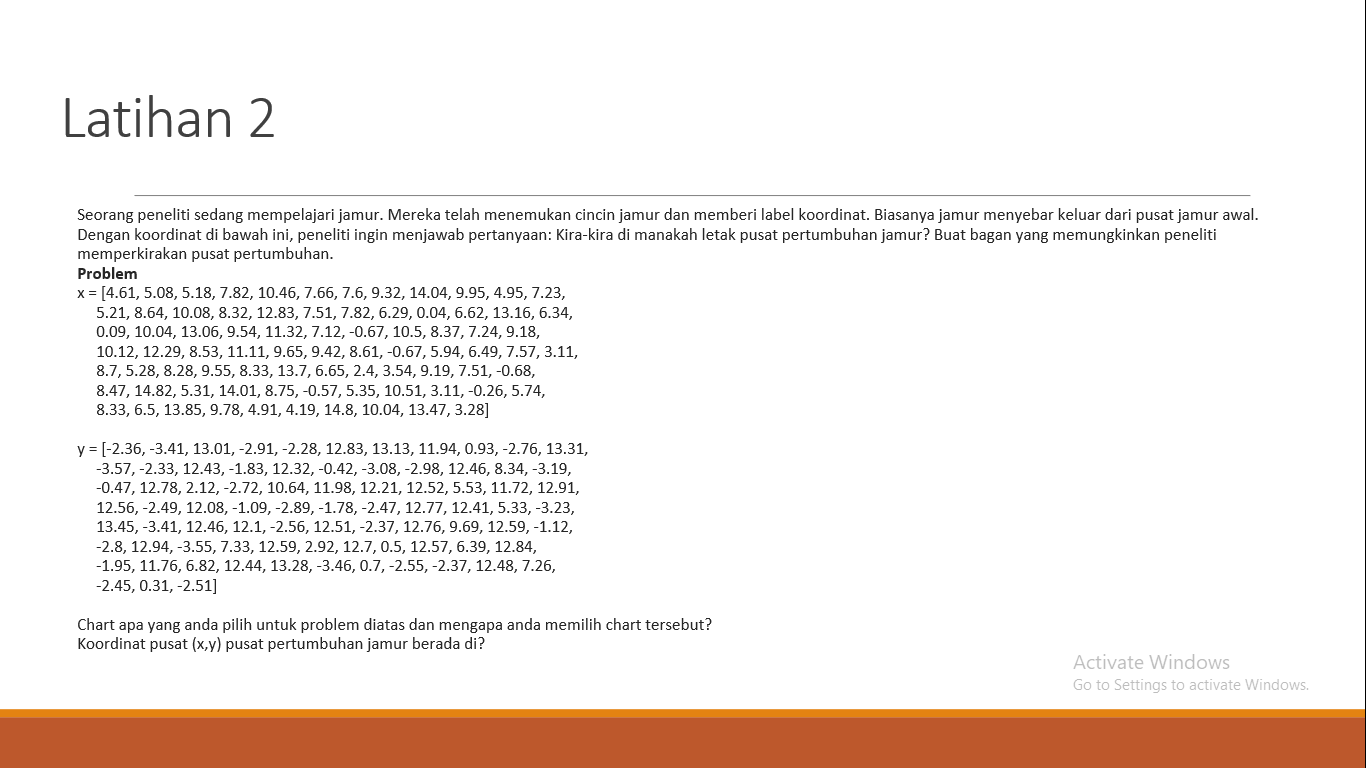

In [ ]:
x = [4.61, 5.08, 5.18, 7.82, 10.46, 7.66, 7.6, 9.32, 
14.04, 9.95, 4.95, 7.23, 5.21, 8.64, 10.08, 8.32, 
12.83, 7.51, 7.82, 6.29, 0.04, 6.62, 13.16, 6.34, 
0.09, 10.04, 13.06, 9.54, 11.32, 7.12, -0.67, 10.5, 
8.37, 7.24, 9.18, 10.12, 12.29, 8.53, 11.11, 9.65, 
9.42, 8.61, -0.67, 5.94, 6.49, 7.57, 3.11, 8.7, 5.28, 
8.28, 9.55, 8.33, 13.7, 6.65, 2.4, 3.54, 9.19, 7.51, 
-0.68, 8.47, 14.82, 5.31, 14.01, 8.75, -0.57, 5.35, 
10.51, 3.11, -0.26 , 5.74,8.33, 6.5, 13.85, 9.78, 4.91, 
4.19, 14.8, 10.04, 13.47, 3.28] 

y = [-2.36, -3.41, 13.01, -2.91, -2.28, 12.83, 13.13,
 11.94, 0.93, -2.76, 13.31, -3.57, -2.33, 12.43, -1.83, 
 12.32, -0.42, -3.08, -2.98, 12.46, 8.34, -3.19, -0.47, 
 12.78, 2.12, -2.72, 10.64, 11.98, 12.21, 12.52, 5.53, 
 11.72, 12.91, 12.56, -2.49, 12.08, -1.09, -2.89, -1.78, 
 -2.47, 12.77, 12.41, 5.33, -3.23, 13.45, -3.41, 12.46, 
 12.1, -2.56, 12.51, -2.37, 12.76, 9.69, 12.59, -1.12, 
 -2.8, 12.94, -3.55, 7.33, 12.59, 2.92, 12.7, 0.5, 
 12.57, 6.39, 12.84, -1.95, 11.76, 6.82, 12.44, 13.28, 
 -3.46, 0.7, -2.55, -2.37, 12.48, 7.26, -2.45, 0.31, -2.51]

In [ ]:
import matplotlib.pyplot as plt

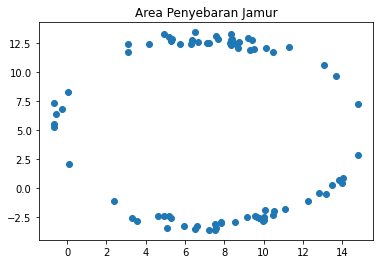

In [ ]:
plt.title('Area Penyebaran Jamur')
plt.scatter(x, y)
plt.show()

Chart yang dipilih adalah Scatter plot (diagram sebar). Karena dengan diagram ini kita dapat melihat persebaran dari koordinat X dan Y jamur. Dapat dilihat Pusat perseberan berada di tengah (7, 5), dengan asumsi pola penyebaran dari gambar di atas berupa oval.